dict_items([(('A', 'B'), 1), (('A', 'C'), 5), (('C', 'D'), 12), (('D', 'E'), 5), (('D', 'F'), 4), (('D', 'G'), 5), (('B', 'A'), 1), (('B', 'C'), 5), (('C', 'A'), 5), (('C', 'B'), 5), (('D', 'C'), 12), (('E', 'D'), 5), (('E', 'F'), 1), (('F', 'D'), 4), (('F', 'E'), 1), (('F', 'G'), 1), (('G', 'D'), 5), (('G', 'F'), 1)])
Community 1: {'C', 'B', 'A'}
Community 2: {'D', 'G', 'E', 'F'}


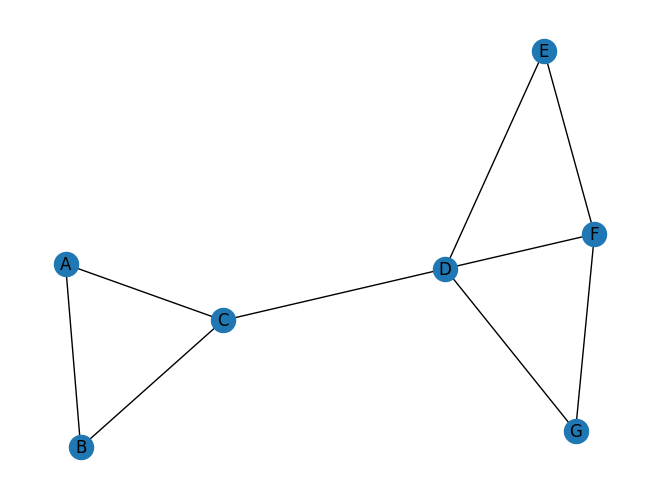

In [ ]:
import networkx as nx
import queue
from collections import defaultdict

def bfs(graph, start, end):
    """
    Perform BFS on the graph starting from the `start` node and ending at the `end` node.
    """
    # Initialize the queue and visited set
    queue = [(start, [start])]
    visited = set()

    # Loop until the queue is empty
    while queue:
        # Get the next node and path
        node, path = queue.pop(0)

        # If the node has been visited, continue
        if node in visited:
            continue

        # Add the node to the visited set
        visited.add(node)

        # If the node is the end node, return the path
        if node == end:
            return path

        # Add the neighbors to the queue
        for neighbor in graph.neighbors(node):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    # If the end node is not reachable, return None
    return None

def edge_betweenness_bfs(graph):
    """
    Calculate the edge betweenness using BFS.
    """
    # Initialize the edge betweenness dictionary
    edge_betweenness = defaultdict(int)

    # Loop through all pairs of nodes
    for start in graph.nodes():
        for end in graph.nodes():
            if start == end:
                continue

            # Perform BFS from the start node to the end node
            path = bfs(graph, start, end)

            # If the path is None, continue
            if path is None:
                continue

            # Increment the edge betweenness for each edge in the path
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                edge_betweenness[edge] += 1

    # Return the edge betweenness as a dictionary
    return edge_betweenness

def girvan_newman(graph):
    # Calculate the edge betweenness
    edge_betweenness = edge_betweenness_bfs(graph)

    # Sort the edges by their betweenness
    sorted_edge_betweenness = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
    print(edge_betweenness.items())
    # Initialize the communities
    communities = [set(graph.nodes())]

    # Remove edges with the highest betweenness
    for edge, betweenness in sorted_edge_betweenness:
        # Remove the edge
        graph.remove_edge(edge[0], edge[1])

        # Calculate the new communities
        new_communities = list(nx.connected_components(graph))

        # If the number of communities has increased, stop removing edges
        if len(new_communities) > len(communities):
            # Add the edge back
            graph.add_edge(edge[0], edge[1])

            # Update the communities
            communities = new_communities

            # Break the loop
            break

    return communities

# Create the graph
graph = nx.Graph()

# Add nodes
graph.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Add edges as undirected connections
graph.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('E', 'D'), ('E', 'F'), ('F', 'D'), ('D', 'G'),('F','G')])

# Find the communities
communities = girvan_newman(graph)

# Print the communities
for i, community in enumerate(communities):
    print(f'Community {i + 1}: {community}')

import matplotlib.pyplot as plt
pos = nx.spring_layout(graph)
nx.draw(graph,pos,with_labels=True)
plt.show()